In [1]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial.distance import euclidean
from tslearn.metrics import dtw_path

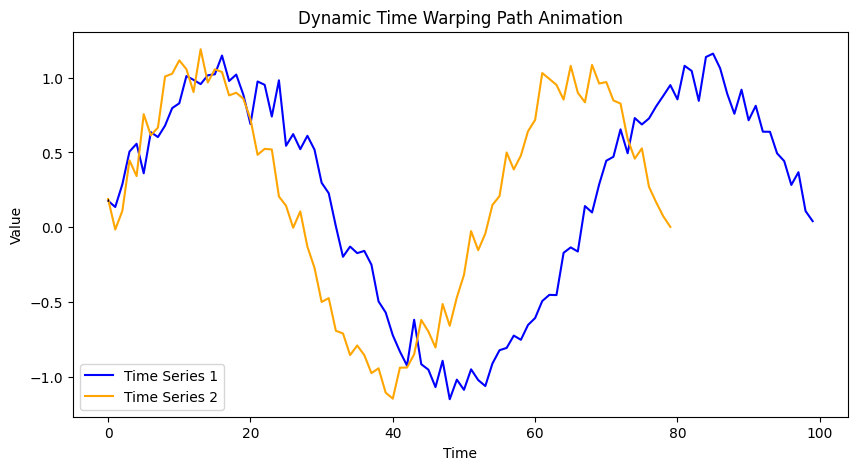

In [4]:
# Generate two sample time series
np.random.seed(0)
time_series_1 = np.sin(np.linspace(0, 3 * np.pi, 100)) + 0.1 * np.random.normal(size=100)
time_series_2 = np.sin(np.linspace(0, 3 * np.pi, 80)) + 0.1 * np.random.normal(size=80)

# Compute the DTW path using tslearn
path, _ = dtw_path(time_series_1, time_series_2)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the two time series
ax.plot(time_series_1, label="Time Series 1", color="blue")
ax.plot(time_series_2, label="Time Series 2", color="orange")
ax.legend()
ax.set_title("Dynamic Time Warping Path Animation")
ax.set_xlabel("Time")
ax.set_ylabel("Value")

# Initialize lines to store the connection points
lines = []

# Update function for the animation
def update(frame):
    i, j = path[frame]
    line, = ax.plot([i, j], [time_series_1[i], time_series_2[j]], 'k--', lw=0.8)
    lines.append(line)  # Keep the lines drawn in previous frames

    return lines  # Return updated list of lines to keep each one visible

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(path), blit=True, interval=30, repeat=False)

plt.show()